<a href="https://colab.research.google.com/github/ArunRamji/Multi-label-classification-using-DL/blob/main/Multi_label_classification_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@Author : Arun Ramji Shanmugam 

Date    : 02'April'2021

Title   : Multi-label classification using DeepLearning demo

### Here is an example of how to work on multi label classification problem using Deep learning.

#### What is multi-label classification? 
"The difference is that in multi-class problems the classes are mutually exclusive, 
whereas for multi-label problems each label represents a different classification task, 
but the tasks are somehow related (so there is a benefit in tackling them together rather than separately). 
For example, in the famous leptograspus crabs dataset there are examples of males and females of two colour forms of crab. 
You could approach this as a multi-class problem with four classes (male-blue, female-blue, male-orange, female-orange) or as a multi-label problem, 
where one label would be male/female and the other blue/orange. 
Essentially in multi-label problems a pattern can belong to more than one class."



### sample code below

In [ ]:
## Create dataset 
# example of a multi-label classification task

from sklearn.datasets import make_multilabel_classification

# define dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
# summarize dataset shape

print(X.shape, y.shape)

# summarize first few examples
for i in range(10):
	print(X[i], y[i])

(1000, 10) (1000, 3)
[ 3.  3.  6.  7.  8.  2. 11. 11.  1.  3.] [1 1 0]
[7. 6. 4. 4. 6. 8. 3. 4. 6. 4.] [0 0 0]
[ 5.  5. 13.  7.  6.  3.  6. 11.  4.  2.] [1 1 0]
[1. 1. 5. 5. 7. 3. 4. 6. 4. 4.] [1 1 1]
[ 4.  2.  3. 13.  7.  2.  4. 12.  1.  7.] [0 1 0]
[ 4.  3.  3.  2.  5.  2.  3.  7.  2. 10.] [0 0 0]
[ 3.  3.  3. 11.  6.  3.  4. 14.  1.  3.] [0 1 0]
[ 2.  1.  7.  8.  4.  5. 10.  4.  6.  6.] [1 1 1]
[ 5.  1.  9.  5.  3.  4. 11.  8.  1.  8.] [1 1 1]
[ 2. 11.  7.  6.  2.  2.  9. 11.  9.  3.] [1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)


In [ ]:
# define the model
from keras.layers import Dense
from keras import models
from keras import layers

nn = models.Sequential()
nn.add(layers.Dense(20, input_dim=X_train.shape[1],kernel_initializer='he_uniform', activation='relu'))
nn.add(Dense(units=512,activation='relu'))
nn.add(Dense(units=256,activation='relu'))
nn.add(Dense(units=128,activation='relu'))
nn.add(Dense(units=128,activation='relu'))
nn.add(Dense(units=64,activation='relu'))
nn.add(Dense(units=64,activation='relu'))
nn.add(Dense(units=32,activation='relu'))
nn.add(Dense(units=16,activation='relu'))
nn.add(layers.Dense(3, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
history = nn.fit(X_train,y_train,epochs=500,batch_size=10)

Epoch 1/500
80/80 [==============================] - 1s 3ms/step - loss: 0.5458
Epoch 2/500
80/80 [==============================] - 0s 3ms/step - loss: 0.3983
Epoch 3/500
80/80 [==============================] - 0s 3ms/step - loss: 0.3181
Epoch 4/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2669
Epoch 5/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2164
Epoch 6/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2346
Epoch 7/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2141
Epoch 8/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2204
Epoch 9/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1934
Epoch 10/500
80/80 [==============================] - 0s 3ms/step - loss: 0.2021
Epoch 11/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1711
Epoch 12/500
80/80 [==============================] - 0s 3ms/step - loss: 0.1844
Epoch 13/500
80/80 [=================

In [ ]:
from sklearn.metrics import accuracy_score

# make a prediction on the test set
yhat = nn.predict(X_test)
# round probabilities to class labels
yhat = yhat.round()
# calculate accuracy
acc = accuracy_score(y_test, yhat)

print(acc)

0.805


## Next Best Product Model - Multi Label classification

Let's work on the real time multi-label problem 

#### problem definition

* To predict which products Bank's existing customers will use in the next month based on their past behavior and that of similar customers. With a more effective recommendation system in place, Santander can better meet the individual needs of all customers and ensure their satisfaction no matter where they are in life.

* you are provided with 1.5 years of customers behavior data from Santander bank to predict what new products customers will purchase. The data starts at 2015-01-28 and has monthly records of products a customer has, such as "credit card", "savings account", etc. You will predict what additional products a customer will get in the last month, 2016-06-28, in addition to what they already have at 2016-05-28. These products are the columns named: ind_(xyz)_ult1, which are the columns #25 - #48 in the training data. You will predict what a customer will buy in addition to what they already had at 2016-05-28. 



#### Data Source :
https://www.kaggle.com/c/santander-product-recommendation/data?select=train_ver2.csv.zip


#### Column Name	Description
fecha_dato	The table is partitioned for this column
ncodpers	Customer code
ind_empleado	Employee index: A active, B ex employed, F filial, N not employee, P pasive
pais_residencia	Customer's Country residence
sexo	Customer's sex
age	Age
fecha_alta	The date in which the customer became as the first holder of a contract in the bank
ind_nuevo	New customer Index. 1 if the customer registered in the last 6 months.
antiguedad	Customer seniority (in months)
indrel	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
ult_fec_cli_1t	Last date as primary customer (if he isn't at the end of the month)
indrel_1mes	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
tiprel_1mes	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
indresi	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
indext	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
conyuemp	Spouse index. 1 if the customer is spouse of an employee
canal_entrada	channel used by the customer to join
indfall	Deceased index. N/S
tipodom	Addres type. 1, primary address
cod_prov	Province code (customer's address)
nomprov	Province name
ind_actividad_cliente	Activity index (1, active customer; 0, inactive customer)
renta	Gross income of the household
segmento	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated
ind_ahor_fin_ult1	Saving Account
ind_aval_fin_ult1	Guarantees
ind_cco_fin_ult1	Current Accounts
ind_cder_fin_ult1	Derivada Account
ind_cno_fin_ult1	Payroll Account
ind_ctju_fin_ult1	Junior Account
ind_ctma_fin_ult1	Más particular Account
ind_ctop_fin_ult1	particular Account
ind_ctpp_fin_ult1	particular Plus Account
ind_deco_fin_ult1	Short-term deposits
ind_deme_fin_ult1	Medium-term deposits
ind_dela_fin_ult1	Long-term deposits
ind_ecue_fin_ult1	e-account
ind_fond_fin_ult1	Funds
ind_hip_fin_ult1	Mortgage
ind_plan_fin_ult1	Pensions
ind_pres_fin_ult1	Loans
ind_reca_fin_ult1	Taxes
ind_tjcr_fin_ult1	Credit Card
ind_valo_fin_ult1	Securities
ind_viv_fin_ult1	Home Account
ind_nomina_ult1	Payroll
ind_nom_pens_ult1	Pensions
ind_recibo_ult1	Direct Debit



In [2]:
import pandas as pd
import numpy as np
import time
import missingno as ms

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 50

In [3]:
df = pd.read_csv('/content/drive/My Drive/Datasets/train_ver2_sample5L.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(500000, 48)

In [5]:
df.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [6]:
#basic stats of dataset
df.describe()

,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,5.000000e+05,494611.000000,494611.000000,494611.000000,494611.0,492205.000000,494611.000000,4.110990e+05,500000.000000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,497734.000000,497734.000000,500000.000000
mean,8.171304e+05,0.000303,1.130769,1.000091,1.0,26.395049,0.519503,1.318600e+05,0.000128,0.000030,0.80422,0.000376,0.090818,0.008912,0.015252,0.151438,0.035440,0.002578,0.002046,0.050704,0.093046,0.021606,0.007312,0.012268,0.002858,0.054782,0.052790,0.031266,0.004590,0.060213,0.067215,0.148174
std,4.381616e+05,0.017412,3.577475,0.013414,0.0,12.844092,0.499620,2.293840e+05,0.011313,0.005477,0.39680,0.019387,0.287350,0.093982,0.122554,0.358476,0.184889,0.050709,0.045186,0.219393,0.290497,0.145393,0.085197,0.110080,0.053384,0.227554,0.223614,0.174036,0.067594,0.237881,0.250394,0.355273
min,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.362618e+05,0.000000,1.000000,1.000000,1.0,15.000000,0.000000,6.748633e+04,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.856585e+05,0.000000,1.000000,1.000000,1.0,28.000000,1.000000,9.982623e+04,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.177883e+06,0.000000,1.000000,1.000000,1.0,35.000000,1.000000,1.531584e+05,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


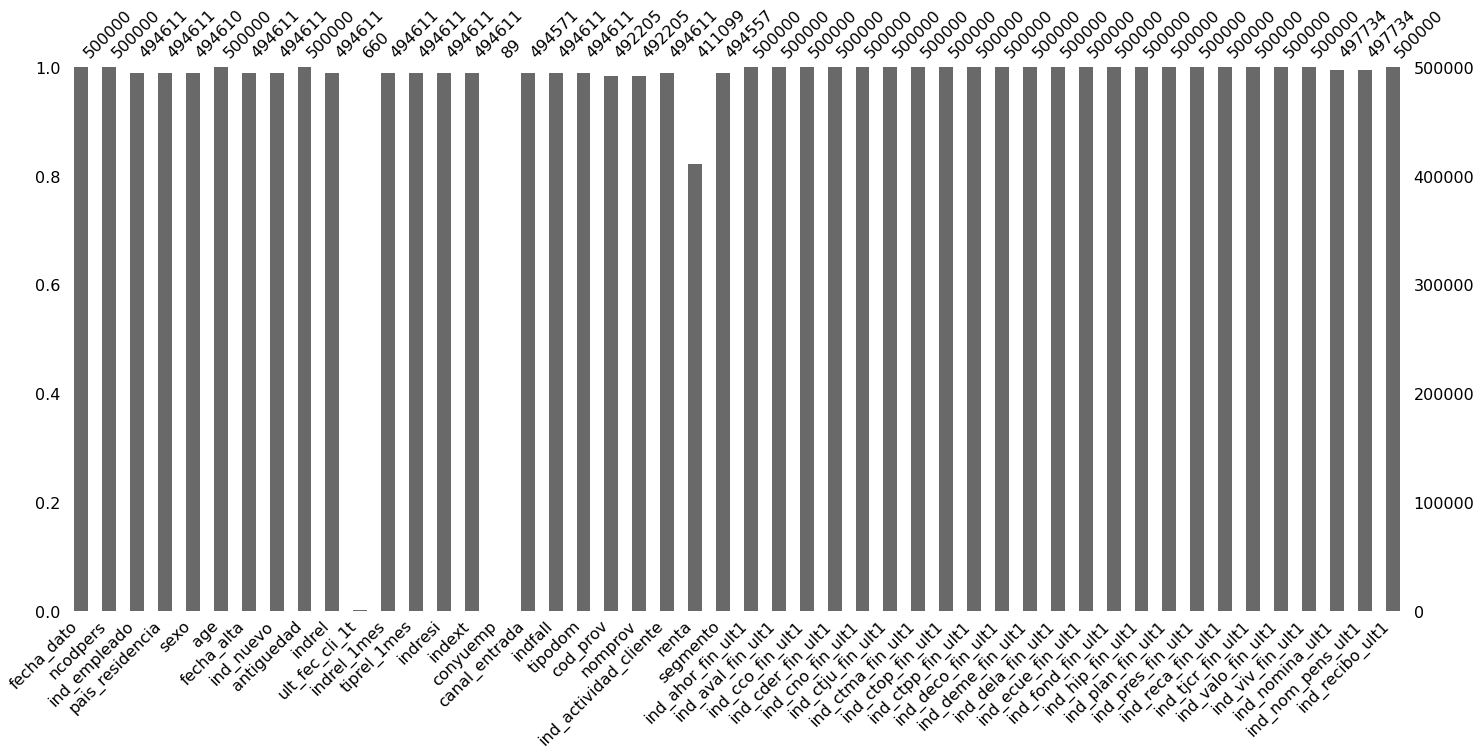

In [7]:
#visualise missing values
ms.bar(df)

* ult_fec_cli_1t , conyuemp has almost 99% missing value 
* renta more than 20% missing value , should impute median

In [8]:
#dropping column where almost 90% has null value
df = df.drop(['conyuemp','ult_fec_cli_1t'],axis=1)

#dropping time series col
df = df.drop(['fecha_dato','fecha_alta'],axis=1)

In [9]:
df.shape

(500000, 44)

In [10]:
#imputing missing values

print('median gross income of household:',df['renta'].median())
df['renta'] = df['renta'].fillna(df['renta'].median())

df.dropna(inplace=True)

median gross income of household: 99826.23


In [11]:
df.isna().any().sum()

0

In [12]:
df.shape

(492111, 44)

In [13]:
df.head()

,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,1375586,N,ES,H,35,0.0,6,1.0,1.0,A,S,N,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,1050611,N,ES,V,23,0.0,35,1.0,1.0,I,S,S,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,1050612,N,ES,V,23,0.0,35,1.0,1.0,I,S,N,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,1050613,N,ES,H,22,0.0,35,1.0,1.0,I,S,N,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,1050614,N,ES,V,23,0.0,35,1.0,1.0,A,S,N,KHE,N,1.0,50.0,ZARAGOZA,1.0,99826.23,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [14]:
#convert mistyped column to appropriate one
df['age'] = df['age'].astype('int32')
df['antiguedad'] = df['antiguedad'].astype('int32')
df['indrel_1mes'] = df['indrel_1mes'].astype('str')
df['indrel'] = df['indrel'].astype('str')

In [15]:
df = pd.get_dummies(df,drop_first=True)

In [16]:
df.shape

(492111, 242)

In [17]:
df.head()

,ncodpers,age,ind_nuevo,antiguedad,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,...,nomprov_LUGO,nomprov_MADRID,nomprov_MALAGA,nomprov_MELILLA,nomprov_MURCIA,nomprov_NAVARRA,nomprov_OURENSE,nomprov_PALENCIA,"nomprov_PALMAS, LAS",nomprov_PONTEVEDRA,"nomprov_RIOJA, LA",nomprov_SALAMANCA,nomprov_SANTA CRUZ DE TENERIFE,nomprov_SEGOVIA,nomprov_SEVILLA,nomprov_SORIA,nomprov_TARRAGONA,nomprov_TERUEL,nomprov_TOLEDO,nomprov_VALENCIA,nomprov_VALLADOLID,nomprov_ZAMORA,nomprov_ZARAGOZA,segmento_02 - PARTICULARES,segmento_03 - UNIVERSITARIO
0,1375586,35,0.0,6,1.0,29.0,1.0,87218.10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1050611,23,0.0,35,1.0,13.0,0.0,35548.74,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1050612,23,0.0,35,1.0,13.0,0.0,122179.11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1050613,22,0.0,35,1.0,50.0,0.0,119775.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,1050614,23,0.0,35,1.0,50.0,1.0,99826.23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [18]:
#target lables
df.iloc[:,8:32].columns

Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

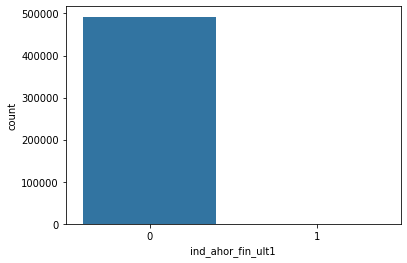

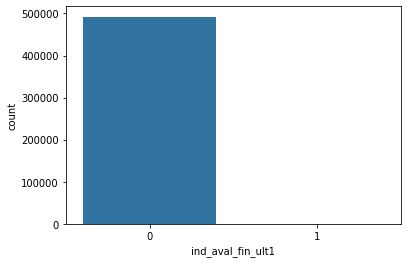

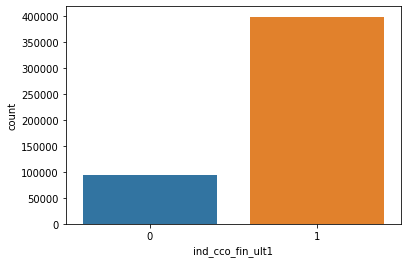

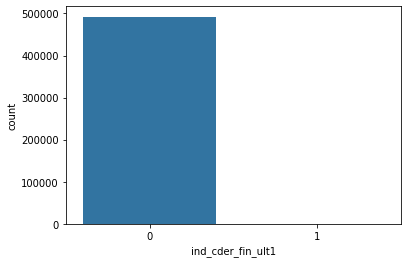

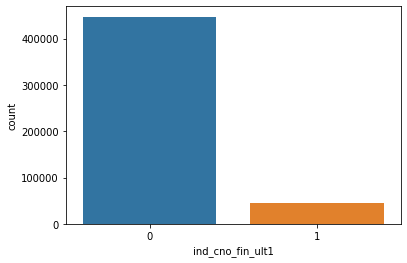

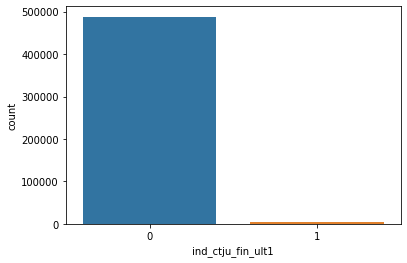

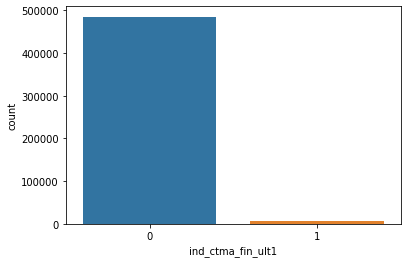

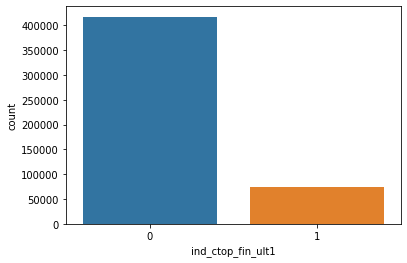

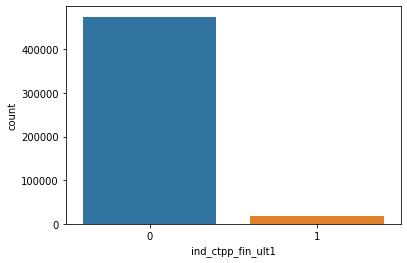

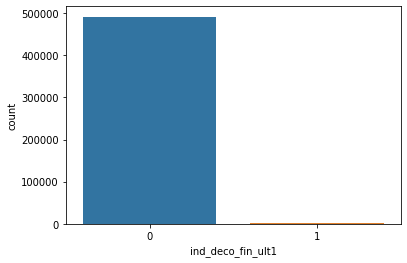

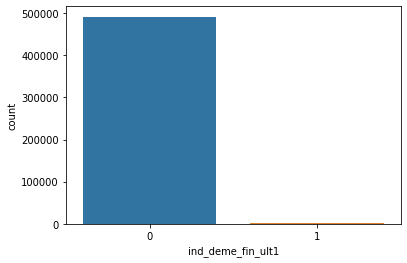

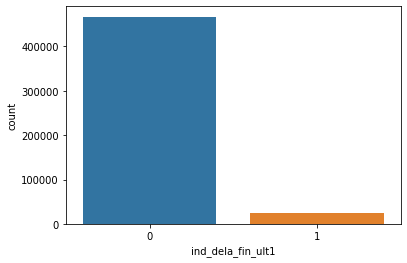

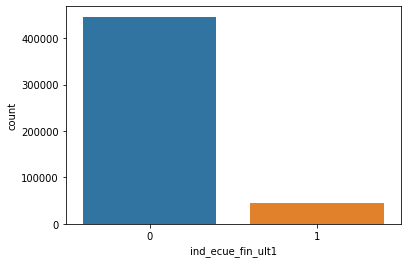

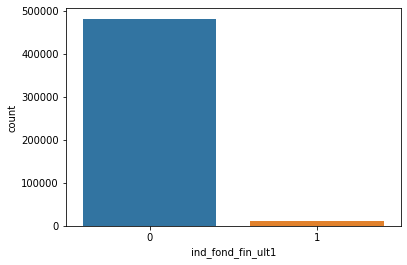

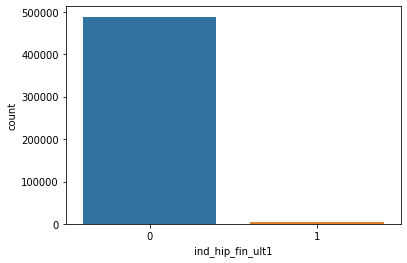

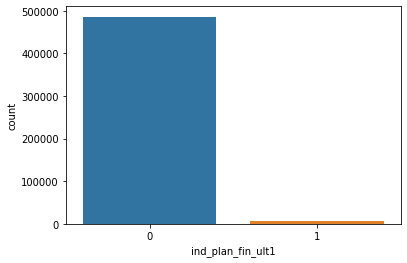

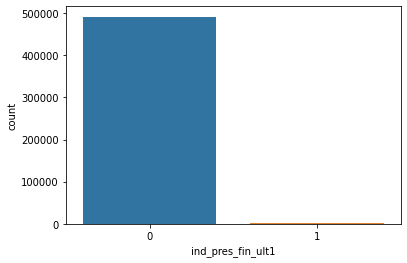

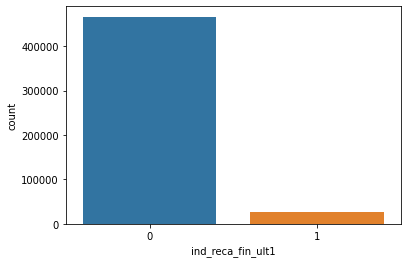

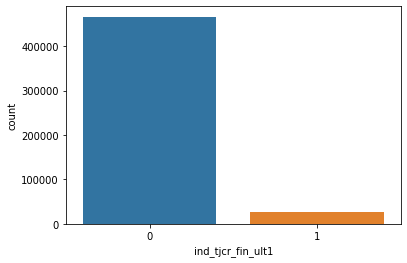

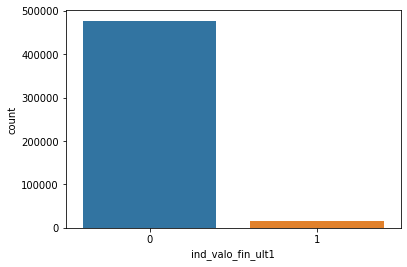

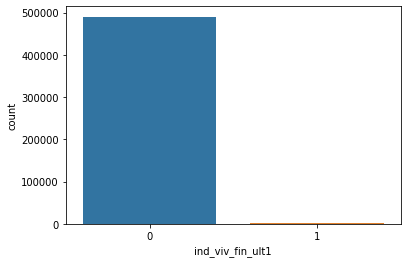

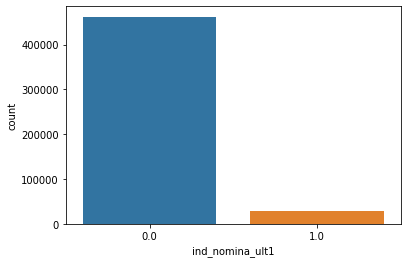

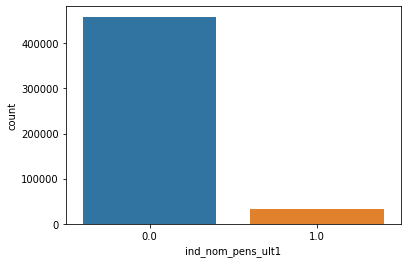

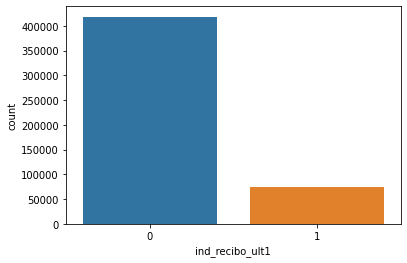

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#class distriubtion
for i in df.iloc[:,8:32].columns:
    plt.figure()
    sns.countplot(df[i])

* Some of the target lables are highly imbalanced , we may have to apply sampling technique to to further increase the model performance later

In [20]:
#variable assignment
X = df.drop(df.iloc[:,8:32].columns,axis=1).values
y =df.iloc[:,8:32].values

In [21]:
print(X.shape)
print(y.shape)

(492111, 218)
(492111, 24)


In [22]:
# summarize first few examples
for i in range(3):
	print(X[i], y[i])

[1.375586e+06 3.500000e+01 0.000000e+00 6.000000e+00 1.000000e+00
 2.900000e+01 1.000000e+00 8.721810e+04 0.000000e+00 0.000000e+00
 1.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 0.000000e

In [23]:
#split train/test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [24]:
print(X_train.shape)
print(y_train.shape)

(393688, 218)
(393688, 24)


In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
# define the model
from keras.layers import Dense
from keras import models
from keras import layers

nn = models.Sequential()
nn.add(layers.Dense(20, input_dim=X_train.shape[1],kernel_initializer='he_uniform', activation='relu'))
nn.add(Dense(units=1024,activation='relu'))
nn.add(layers.Dropout(0.2))
nn.add(Dense(units=512,activation='relu'))
nn.add(layers.Dropout(0.1))
nn.add(Dense(units=256,activation='relu'))
nn.add(layers.Dropout(0.05))
nn.add(Dense(units=128,activation='relu'))
nn.add(Dense(units=128,activation='relu'))
nn.add(Dense(units=64,activation='relu'))
nn.add(Dense(units=64,activation='relu'))
nn.add(Dense(units=32,activation='relu'))
nn.add(Dense(units=32,activation='relu'))
nn.add(layers.Dense(24, activation='sigmoid'))


# optimizer = keras.optimizers.Adam(lr=0.01)
nn.compile(loss='binary_crossentropy', optimizer='adam',
           metrics=['accuracy'])

In [42]:
print(time.ctime())
history = nn.fit(X_train,y_train,epochs=200,batch_size=1000,
                         validation_data=(X_test,y_test)
)
print(time.ctime())

Fri Apr  2 08:42:07 2021
Epoch 1/200
394/394 [==============================] - 2s 6ms/step - loss: 0.1153 - accuracy: 0.8062 - val_loss: 0.1135 - val_accuracy: 0.7948
Epoch 2/200
394/394 [==============================] - 2s 5ms/step - loss: 0.1112 - accuracy: 0.8023 - val_loss: 0.1101 - val_accuracy: 0.8001
Epoch 3/200
394/394 [==============================] - 2s 5ms/step - loss: 0.1092 - accuracy: 0.7999 - val_loss: 0.1107 - val_accuracy: 0.8033
Epoch 4/200
394/394 [==============================] - 2s 5ms/step - loss: 0.1082 - accuracy: 0.7990 - val_loss: 0.1094 - val_accuracy: 0.8004
Epoch 5/200
394/394 [==============================] - 2s 5ms/step - loss: 0.1073 - accuracy: 0.7969 - val_loss: 0.1109 - val_accuracy: 0.8004
Epoch 6/200
394/394 [==============================] - 2s 5ms/step - loss: 0.1067 - accuracy: 0.7976 - val_loss: 0.1098 - val_accuracy: 0.7995
Epoch 7/200
394/394 [==============================] - 2s 5ms/step - loss: 0.1062 - accuracy: 0.7982 - val_loss: 0.11

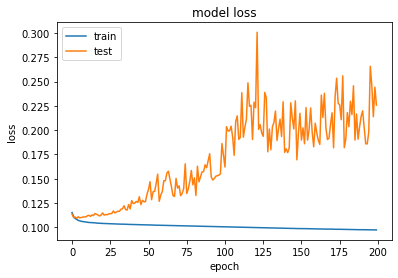

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

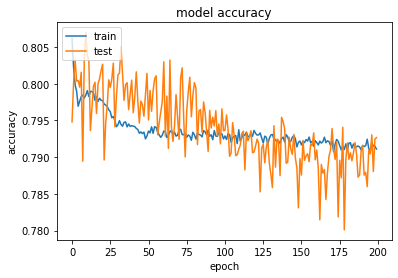

In [44]:
# Ploting  Accuracy 

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
#Train overall accuracy
from sklearn.metrics import accuracy_score

# make a prediction on the test set
yhat = nn.predict(X_train)
# round probabilities to class labels
yhat = yhat.round()
# calculate accuracy
acc = accuracy_score(y_train, yhat)

print(acc)

0.6173060901018065


In [46]:
#OOS overall accuracy
from sklearn.metrics import accuracy_score

# make a prediction on the test set
yhat = nn.predict(X_test)
# round probabilities to class labels
yhat = yhat.round()
# calculate accuracy
acc = accuracy_score(y_test, yhat)

print(acc)

0.5621043861698993


In [67]:
#Accuracy and AUC of each label 
from sklearn import metrics
from sklearn.metrics import accuracy_score


for i in range(0,24):
  fpr, tpr, thresholds = metrics.roc_curve(y_test[:,i], yhat[:,i])
  print('AUC for label',i+1,':',metrics.auc(fpr, tpr))
  print('Accuacy for label',i+1,':',accuracy_score(y_test, yhat),'\n')

AUC for label 1 : 0.5
Accuacy for label 1 : 0.5621043861698993 

AUC for label 2 : nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Accuacy for label 2 : 0.5621043861698993 

AUC for label 3 : 0.5212449589179737
Accuacy for label 3 : 0.5621043861698993 

AUC for label 4 : 0.5
Accuacy for label 4 : 0.5621043861698993 

AUC for label 5 : 0.5037881168296987
Accuacy for label 5 : 0.5621043861698993 

AUC for label 6 : 0.7903698491898796
Accuacy for label 6 : 0.5621043861698993 

AUC for label 7 : 0.5154153511200805
Accuacy for label 7 : 0.5621043861698993 

AUC for label 8 : 0.49742989983216046
Accuacy for label 8 : 0.5621043861698993 

AUC for label 9 : 0.5006829772500628
Accuacy for label 9 : 0.5621043861698993 

AUC for label 10 : 0.504061261490479
Accuacy for label 10 : 0.5621043861698993 

AUC for label 11 : 0.5
Accuacy for label 11 : 0.5621043861698993 

AUC for label 12 : 0.5359513651808764
Accuacy for label 12 : 0.5621043861698993 

AUC for label 13 : 0.5084976758510583
Accuacy for label 13 : 0.5621043861698993 

AUC for label 14 : 0.5004296616333845
Accuacy for label 14 : 0.5621043861698993 

AUC for label 15 

In [76]:
#classification report of each label
from sklearn.metrics import classification_report

for i,j in zip(range(0,24), df.iloc[:,8:32].columns):
  print(i+1,'.classification report of ',j)
  print(classification_report(y_test[:,i],yhat[:,i]))

1 .classification report of  ind_ahor_fin_ult1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     98411
         1.0       0.00      0.00      0.00        12

    accuracy                           1.00     98423
   macro avg       0.50      0.50      0.50     98423
weighted avg       1.00      1.00      1.00     98423

2 .classification report of  ind_aval_fin_ult1


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     98423

    accuracy                           1.00     98423
   macro avg       1.00      1.00      1.00     98423
weighted avg       1.00      1.00      1.00     98423

3 .classification report of  ind_cco_fin_ult1
              precision    recall  f1-score   support

         0.0       0.42      0.06      0.11     18795
         1.0       0.82      0.98      0.89     79628

    accuracy                           0.80     98423
   macro avg       0.62      0.52      0.50     98423
weighted avg       0.74      0.80      0.74     98423

4 .classification report of  ind_cder_fin_ult1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     98370
         1.0       0.00      0.00      0.00        53

    accuracy                           1.00     98423
   macro avg       0.50      0.50      0.50     98423
weighted avg       1.00      1.00  

* As we see there are lot of ways we can improve the model performance further (balancing class distribution , trying different NN structure, hyper param tuning,callback ..etc) , but our objective was to explain how to implement multi-label model using deep learning , we are stopping here . 

* Based on the above example and model performance it is evident that we can use deep learning to tackle complex multilabel usecases like these .

